### Peter Potros Nassim
### G 03

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
x = load_iris().data
y = load_iris().target

In [3]:
def get_mean(mcol):
    mean = sum(mcol) / len(mcol)
    return mean

In [12]:
def get_standardize(mcol):
    mu = get_mean(mcol)
    return (mcol-mu)

In [21]:
def standardize(D):
    Z = np.zeros(D.shape)
    for i in range(0,D.shape[1]):
        Z[:,i] = (D[:,i]-get_mean(D[:,i]))
    return Z
df_std = standardize(x)
df_std.shape

(150, 4)

In [27]:
cov_matrix = df_std.T @ df_std
cov_matrix

array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
       [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
       [189.873     , -49.1188    , 464.3254    , 193.0458    ],
       [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]])

In [28]:
eig, vec = np.linalg.eig(np.array(cov_matrix))

In [31]:
print('the eigenvalues: ')
print(eig)

the eigenvalues: 
[630.0080142   36.15794144  11.65321551   3.55142885]


In [33]:
print('the eigenvectors: ')
print(np.array(vec))

the eigenvectors: 
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [34]:
k_eigenvectors = np.array(vec)[:,0:2]
print(k_eigenvectors)

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


In [41]:
x_new = df_std @ k_eigenvectors
print(x_new)

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

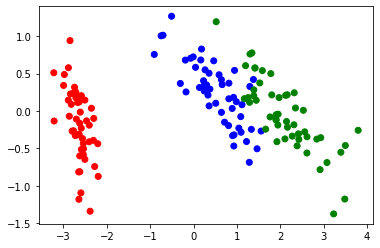

In [63]:
colors = {0:'red', 1:'blue', 2:'green'}
df = pd.DataFrame(dict(y=y))
fig, ax = plt.subplots()
ax.scatter(x_new[:,0:1], x_new[:,1:2], c=df['y'].map(colors))
plt.show()